In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori

## Read csv file

In [3]:
df = pd.read_csv('Online Retail.csv', encoding='utf-8', low_memory=False)

In [4]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## Exploratory Data Analysis

### How many products they have sell?

In [8]:
print('They have {} products.'.format(len(df['Description'].unique())))

They have 4224 products.


## How many transactions?

In [9]:
print('{} transactions.'.format(len(df['InvoiceNo'].unique())))

25900 transactions.


In [15]:
df.groupby('Description')['Quantity'].sum()

Description
 4 PURPLE FLOCK DINNER CANDLES          144
 50'S CHRISTMAS GIFT BAG LARGE         1913
 DOLLY GIRL BEAKER                     2448
 I LOVE LONDON MINI BACKPACK            389
 I LOVE LONDON MINI RUCKSACK              1
 NINE DRAWER OFFICE TIDY                 59
 OVAL WALL MIRROR DIAMANTE              233
 RED SPOT GIFT BAG LARGE               1727
 SET 2 TEA TOWELS I LOVE LONDON        2781
 SPACEBOY BABY GIFT SET                 493
 TOADSTOOL BEDSIDE LIGHT                  2
 TRELLIS COAT RACK                      226
*Boombox Ipod Classic                     1
*USB Office Mirror Ball                   2
10 COLOUR SPACEBOY PEN                 6392
12 COLOURED PARTY BALLOONS             2135
12 DAISY PEGS IN WOOD BOX               349
12 EGG HOUSE PAINTED WOOD               148
12 HANGING EGGS HAND PAINTED             42
12 IVORY ROSE PEG PLACE SETTINGS        968
12 MESSAGE CARDS WITH ENVELOPES        1739
12 PENCIL SMALL TUBE WOODLAND          4502
12 PENCILS SMALL TUB

Wow there are negative values in the quantity? Maybe customers cancel the transaction, thats why the values become negative. Need to discard this transaction is it will affect our analysis.

## Remove product that have negative values in quantity

In [20]:
# get the list transaction that have negative values

index_neg_quantity = df.index[df['Quantity'] < 0].tolist()

In [21]:
len(index_neg_quantity)

10624

In [25]:
(df.iloc[index_neg_quantity]).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


Yeah confirm the quantity is negative value! So just drop it!

In [26]:
df_noneg = df.drop(index_neg_quantity)

In [28]:
df_noneg.shape

(531285, 8)

In [29]:
df.shape

(541909, 8)

So df_noneg is our new dataframe that only have positive values in quantity. We will use this dataframe for further analysis.

## Check missing value?

In [30]:
df_noneg.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

Wow so there are more than 100k customer ID missing? Maybe they do some testing to the system without entering the customer ID or maybe error from the system. Let see how many percents the data missing in column Description and CustomerID

In [36]:
missing_Desc = (df_noneg['Description'].isnull().sum()/len(df_noneg)) * 100
missing_CustID = (df_noneg['CustomerID'].isnull().sum()/len(df_noneg)) * 100

print('{:.3}% of data are missing for Description column.'.format(missing_Desc))
print('{:.3}% of data are missing for CustomerID column.'.format(missing_CustID))

0.111% of data are missing for Description column.
25.1% of data are missing for CustomerID column.


25% is quite high for CustomerID, in fact this column means nothing since it is just a customer ID which it is just an ID. But afraid that this missing data caused by system error, it is better we removed all the rows that have missing data in customer ID and description.

In [37]:
df_nomissing = df_noneg.dropna()

In [38]:
df_nomissing.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Nice! So our data got no missing value

## Analysis on country

Since our data is large, so maybe we need to focus on each country first.

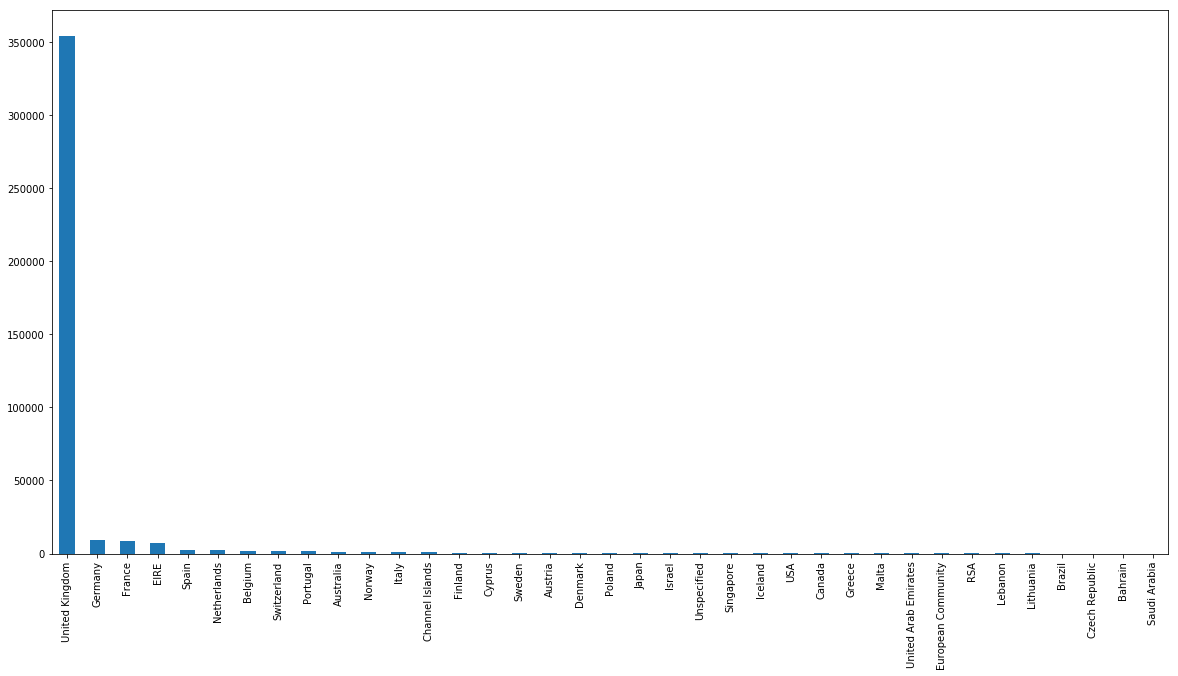

In [45]:
% matplotlib inline
plt.figure(figsize=(20,10))
df_nomissing['Country'].value_counts().plot(kind='bar')

Walaoweh! UK has the highest transactions. And the lowest one is from Saudi Arabia.

### Top 5 product buy for each countries

In [48]:
df_nomissing.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [58]:
print('{} unique stock codes'.format(len(df_nomissing['StockCode'].unique())))

3665 unique stock codes


In [57]:
print('{} unique descriptions'.format(len(df_nomissing['Description'].unique())))

3877 unique descriptions


So from here, we can see that the description of the same stockcode maybe different.

In [52]:
list_more_1_desc = [ stock for stock in df_nomissing['StockCode'].unique() \
    if len(df_nomissing[df_nomissing['StockCode'] == stock]) > 1]

To see one stock code that have more than one description

In [56]:
df_oneStockCode = df_nomissing[df_nomissing['StockCode'] == list_more_1_desc[0]]
df_oneStockCode['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

So from this result, I decided to use stock code as a product.

In [60]:
list_country = df_nomissing['Country'].unique()

In [78]:
for country in list_country:
    df_country = df_nomissing[df_nomissing['Country'] == country]
    total_quantity_products = df_country.groupby('StockCode')['Quantity'].sum()
    print('Country : {}'.format(country))
    print(total_quantity_products.sort_values(ascending=False)[:5]) # top 5 stockcodes with highest quantity
    print('\n\n')

Country : United Kingdom
StockCode
23843     80995
23166     76919
84077     49182
22197     45632
85099B    41981
Name: Quantity, dtype: int64



Country : France
StockCode
23084    4000
22492    2196
21731    1291
21086    1272
84879    1204
Name: Quantity, dtype: int64



Country : Australia
StockCode
22492    2952
23084    1884
21915    1704
21731    1344
22969    1080
Name: Quantity, dtype: int64



Country : Netherlands
StockCode
23084    4801
22629    4528
22630    4132
21212    4128
22326    3132
Name: Quantity, dtype: int64



Country : Germany
StockCode
22326    1233
15036    1164
POST     1114
20719    1020
21212    1002
Name: Quantity, dtype: int64



Country : Norway
StockCode
16008    576
22693    504
22197    444
72232    384
84050    252
Name: Quantity, dtype: int64



Country : EIRE
StockCode
22197     1828
21212     1632
84991     1464
17084R    1440
22952     1440
Name: Quantity, dtype: int64



Country : Switzerland
StockCode
22554    636
22326    480
22551    468
2

## How many unique products sell for each country?
## How many unique transactions for each country?
## Ratio one transaction per products?

In [85]:
for country in list_country:
    df_country = df_nomissing[df_nomissing['Country'] == country]
    print('Number of product sell for {} is : {} products'.format(country, len(df_country['StockCode'].unique())))
    print('Number of transaction for {} is : {} transactions'.format(country, len(df_country['InvoiceNo'].unique())))
    print('Ratio 1 transaction : {:.3} products'. format((len(df_country['StockCode'].unique()) / len(df_country['InvoiceNo'].unique()))))
    print()

Number of product sell for United Kingdom is : 3645 products
Number of transaction for United Kingdom is : 16649 transactions
Ratio 1 transaction : 0.219 products

Number of product sell for France is : 1522 products
Number of transaction for France is : 389 transactions
Ratio 1 transaction : 3.91 products

Number of product sell for Australia is : 599 products
Number of transaction for Australia is : 57 transactions
Ratio 1 transaction : 10.5 products

Number of product sell for Netherlands is : 783 products
Number of transaction for Netherlands is : 95 transactions
Ratio 1 transaction : 8.24 products

Number of product sell for Germany is : 1665 products
Number of transaction for Germany is : 457 transactions
Ratio 1 transaction : 3.64 products

Number of product sell for Norway is : 591 products
Number of transaction for Norway is : 36 transactions
Ratio 1 transaction : 16.4 products

Number of product sell for EIRE is : 1943 products
Number of transaction for EIRE is : 260 transact